In [1]:
import pandas as pd
import io
import requests

In [2]:
import matplotlib.pyplot as plt

In [3]:
#read data
url="https://raw.githubusercontent.com/VankatPetr/BoE_stress_test/master/data/Projected%20cumulative%20five-year%20impairment%20charge%20rates%20on%20UK%20lending%20in%20the%20stress%20scenario.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')), error_bad_lines=False)

In [4]:
#drop 'Lending to businesses excluding commercial real estate' as this contains NaN
c_drop_columns=c.drop([' Lending to businesses excluding commercial real estate'], axis=1)

In [5]:
#drop rows with NaN
c_drop_NAN=c_drop_columns.dropna()

In [6]:
#pivot data
pivoted = c_drop_NAN.pivot('Year', 'Bank',' Non-mortgage lending to individuals')

In [7]:
#show data
pivoted.head()

Bank,Barclays,HSBC,Lloyds Banking Group,Nationwide,Santander UK,The Royal Bank of Scotland Group
Year,,,,,,
2015,24.6,7.7,18.7,17.4,11.1,14.1
2016,25.3,12.5,20.0,21.3,11.3,17.0
2017,36.8,18.0,28.8,29.1,19.9,21.8
2018,35.9,22.4,27.0,27.4,20.6,22.5


In [8]:
#reset index for chart purposes
pivoted.reset_index(inplace=True)

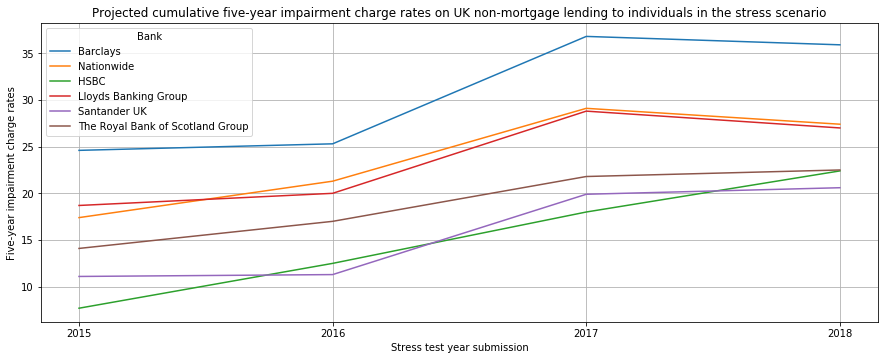

In [9]:
chart=pivoted.plot(x='Year', y=['Barclays','Nationwide', 'HSBC','Lloyds Banking Group', 'Santander UK','The Royal Bank of Scotland Group'],
                   figsize=(15,5.5), grid=True, xticks=(2015,2016,2017,2018), 
                   title='Projected cumulative five-year impairment charge rates on UK non-mortgage lending to individuals in the stress scenario')
chart.set_xlabel("Stress test year submission")
chart.set_ylabel("Five-year impairment charge rates")
plt.show()

Comments:

1) Barclays have had significantly higher cumulative five-year impairment charge in the stress test scenario than the other banks in every stress test submission.

2) Nationwide and Lloyds portfolios have very similar sensitivity to the stress scenario.

Source: Boe Stress Test Results (2015-2018), https://www.bankofengland.co.uk/stress-testing
